# Ford GoBikes Dataset Exploration
## by (Abba Jibril)

## Introduction
> Introduce the dataset


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

sb.set_style('darkgrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Data Assessment

In [3]:
# high-level overview of data and shape
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
# display first five rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# display the total number of missing values in each column
print(df.isnull().sum())

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [6]:
# display the total number of duplicate entries
print(df.duplicated().sum())

0


In [7]:
# displays the frequencies of each value in user_type, and bike_share_for_all_trip columns
print(df['user_type'].value_counts())
print(df['bike_share_for_all_trip'].value_counts())

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64
No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64


### Assessment Summary
##### Quality Isuees:
* Missing values in `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`and `member_gender` variables.
* Inaccurate data types in `start_time`, `end_time` (object instead of datetime)
* Inaccurate data types in `start_station_id`, `end_station_id` (float instead of str/object)
* Inaccurate data type in `user_type` (object instead of category)
* Inaccurate data type in`bike_share_for all_trip` (object instead of bool)


### Data Cleaning

In [8]:
# make a copy of the dataframe and drop rows with missing values, display high-level overview of the new dataframe
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> _issue 1_: Missing values in `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`and `member_gender` variables.

__Define__ <br>
drop all rows with missing values using the dropna function

__Code__ 

In [9]:
df_clean = df_clean.dropna()

__Test__

In [10]:
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> _issue 2_: Inaccurate data types in `start_time`, `end_time` (object instead of datetime)


__Define__<br>
change the data types of start_time and end_time to datetime using the pd.datetime function

__Code__

In [11]:
df_clean[['start_time', 'end_time']] = df_clean[['start_time', 'end_time']].apply(pd.to_datetime)

__Test__

In [12]:
print(df_clean.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


> _issue 3_: Inaccurate data types in `start_station_id`, `end_station_id` (float instead of str/object)


__Define__<br>
convert start_station_id and end_station_id to str using the astype function

__Code__

In [13]:
df_clean[['start_station_id', 'end_station_id']] = df_clean[['start_station_id', 'end_station_id']].astype(str)

__Test__

In [14]:
print(df_clean.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


> _issue 4:_ Inaccurate data type in `user_type` (object instead of category)


__Define__<br>
convert user_type to category using astype function

__Code__

In [15]:
from unicodedata import category


df_clean['user_type'] = df_clean['user_type'].astype('category')

__Test__

In [16]:
df_clean['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

> _issue 5:_ Inaccurate data type in`bike_share_for all_trip` (object instead of bool)

__Define__<br>
convert bike_share_for_all_trip to bool using basic python statement

__Code__

In [17]:
df_clean['bike_share_for_all_trip'] = (df_clean['bike_share_for_all_trip'] == 'Yes')

__Test__

In [18]:
df_clean['bike_share_for_all_trip'].dtype

dtype('bool')

> More tweaks for more effective exploration

In [19]:
# record duration in minutes and store in a new variable
df_clean['duration_min'] = df_clean['duration_sec']/60

In [20]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_clean['start_weekday'] = df_clean['start_time'].dt.weekday
df_clean['start_day_time'] = df_clean['start_time'].dt.hour.astype(str)

df_clean['start_weekday'] = df_clean['start_weekday'].replace([0,1,2,3,4,5,6], days)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [22]:
df_clean['start_weekday'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_weekday, dtype: int64

In [23]:
df_clean['start_day_time'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_day_time, dtype: int64

In [24]:
df_clean.to_csv('fordgobike-tripdata_clean.csv', encoding = 'utf-8', index = None)

## Exploratory Data Analysis 

In [25]:
fordgobike = pd.read_csv('fordgobike-tripdata_clean.csv')
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_weekday,start_day_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,869.750000,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,1030.900000,Thursday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,608.166667,Thursday,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,26.416667,Thursday,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False,29.883333,Thursday,23


In [26]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### What is the structure of your dataset?

After the data wrangling process, the dataset contains 174952 fordgobike trips with 19 characteristics; including `duration_sec`, `start_time`, `end_time`, `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude` ,`end_station_longitude`, `bike_id`, `user_type`, `member_birth_year` `member_gender`, `bike_share_for_all_trip`, `duration_min`, `start_weekday`, `start_day_time`. Out of 19 specifications 10 are numerical types, 2 are datetime types, 3 are object types, 3 are categorical types, and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out:
* How other features affect trip duration.
* Trips distribution between day hours, week days, user_type and gender.
* The most popular start stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 * duration_min
 * user_type
 * user_gender
 * start_week_day
 * start_day_time

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


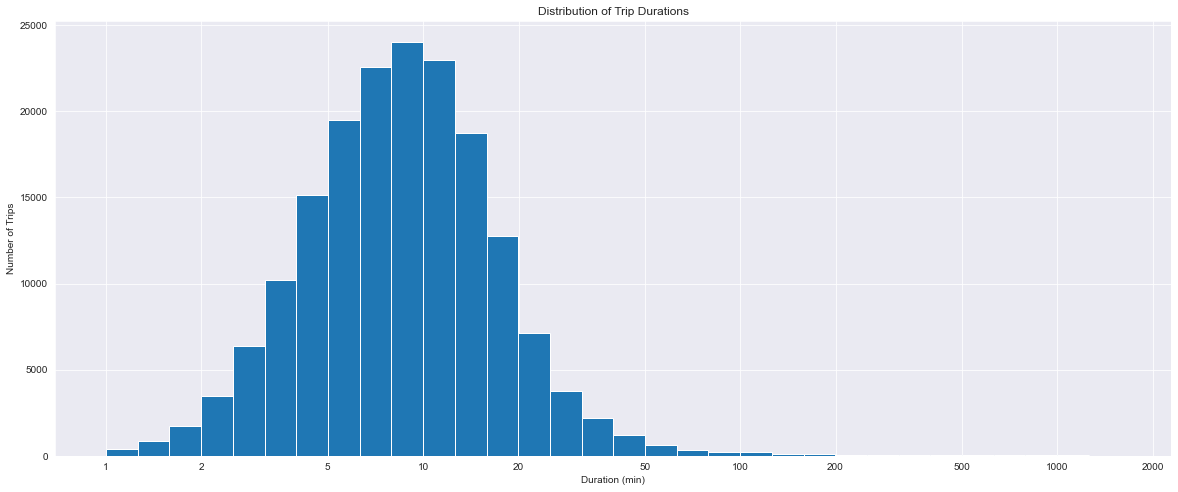

In [27]:
bins = 10 ** np.arange(0.0, np.log10(fordgobike['duration_min'].max()) + 0.1, 0.1)

plt.figure(figsize=[20, 8])
plt.hist(data = fordgobike, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.xticks(ticks, ticks)
plt.show()

Text(0.5, 0, 'Week Day')

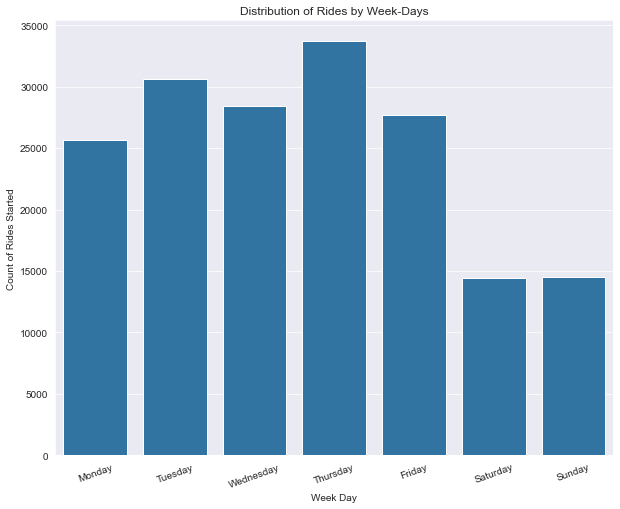

In [28]:
base_color = sb.color_palette()[0]

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays= pd.api.types.CategoricalDtype(categories = days, ordered = True)
fordgobike['start_weekday'] = fordgobike['start_weekday'].astype(weekdays)

plt.figure(figsize = [10, 8])
sb.countplot(data = fordgobike, x = 'start_weekday', color = base_color)
plt.title('Distribution of Rides by Week-Days')
plt.xticks(rotation = 20)
plt.ylabel('Count of Rides Started')
plt.xlabel('Week Day')


Text(0.5, 0, 'Day Hour')

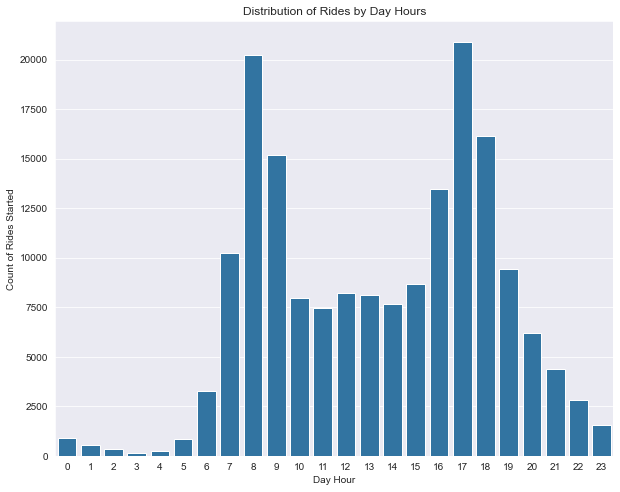

In [29]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 8])
sb.countplot(data = fordgobike, x = 'start_day_time', color = base_color)
plt.title('Distribution of Rides by Day Hours')
plt.ylabel('Count of Rides Started')
plt.xlabel('Day Hour')

Text(0.5, 0, 'User Type')

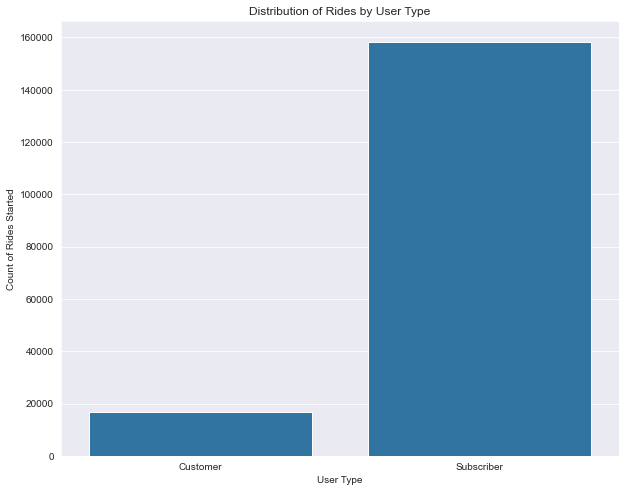

In [30]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 8])
sb.countplot(data = fordgobike, x = 'user_type', color = base_color)
plt.title('Distribution of Rides by User Type')
plt.ylabel('Count of Rides Started')
plt.xlabel('User Type')

Text(0.5, 0, 'Member Gender')

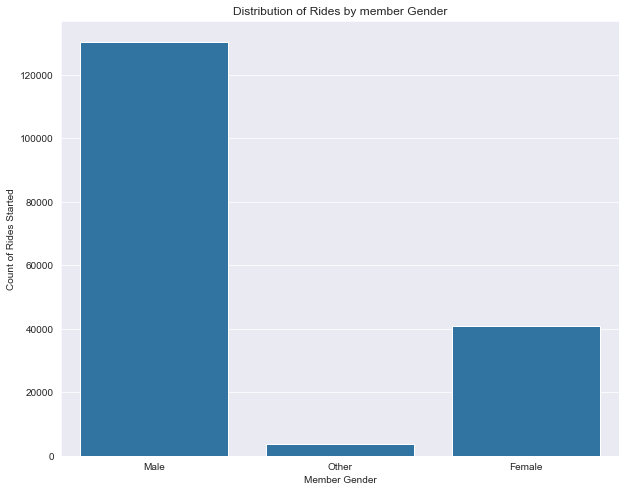

In [31]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 8])
sb.countplot(data = fordgobike, x = 'member_gender', color = base_color)
plt.title('Distribution of Rides by member Gender')
plt.ylabel('Count of Rides Started')
plt.xlabel('Member Gender')



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0, 0.5, 'Trip Duration (min)')

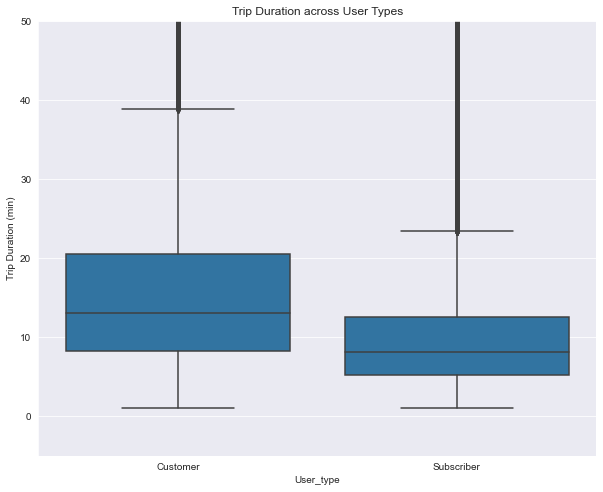

In [35]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 8])
sb.boxplot(data = fordgobike, x = 'user_type', y = 'duration_min', color = base_color);
plt.ylim(-5, 50)
plt.title('Trip Duration across User Types')
plt.xlabel('User_type')
plt.ylabel('Trip Duration (min)')

Text(0, 0.5, 'Trip Duration (min)')

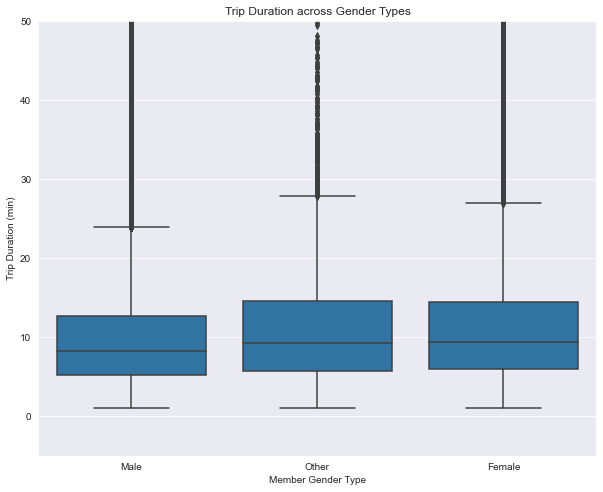

In [40]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 8])
sb.boxplot(data = fordgobike, x = 'member_gender', y = 'duration_min', color = base_color);
plt.ylim(-5, 50)
plt.title('Trip Duration across Gender Types')
plt.xlabel('Member Gender Type')
plt.ylabel('Trip Duration (min)')

Text(0.5, 1.0, 'Correlation between Trip Duration and Age')

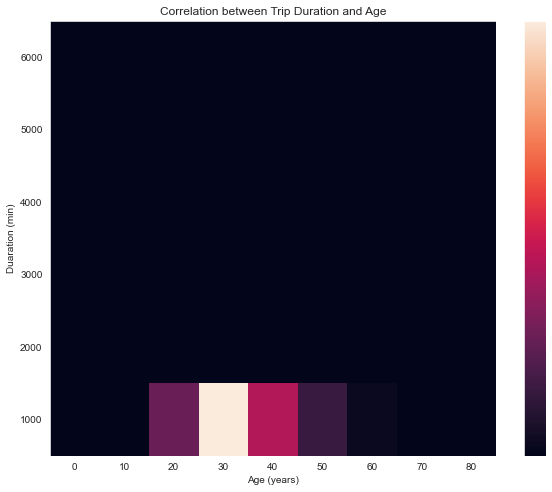

In [49]:
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)

plt.figure(figsize = [10, 8])
plt.hist2d((2019 - fordgobike['member_birth_year']), fordgobike['duration_min'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (min)')
plt.title('Correlation between Trip Duration and Age')

(-5.0, 40.0)

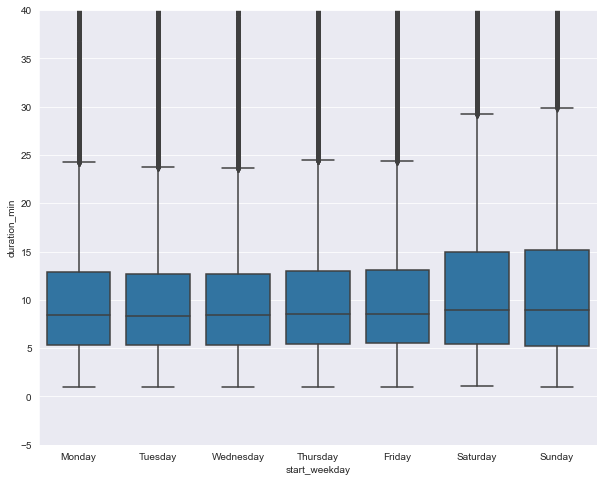

In [58]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 8])
sb.boxplot(data = fordgobike, x = 'start_weekday', y = 'duration_min', color = base_color)
plt.ylim(-5, 40)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
plt.figure(figsize = [10, 8])

sb.barplot(data = fordgobike, )

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

